ASSIGNMENT 1 - REGRESSION

Task 1:
Enclosed is a dataset for car price prediction. Preprocess the dataset, perform exploratory data analysis, scale the data, and create regression models (linear, lasso, ridge, elastic net), you can use other regression models as well. Try to get as minimum RMSE as possible. Use feature selection methods if necessary. We will see who comes up with the best model.

Dataset: https://drive.google.com/file/d/1yr5nB2gGhnIAqSybvKscdrybzp1GjV_g/view?usp=share_link


In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('CarPrice_Assignment (1).csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [5]:
print(df['symboling'].unique())
print(df['fueltype'].unique())
print(df['aspiration'].unique())
print(df['doornumber'].unique())
print(df['carbody'].unique())
print(df['drivewheel'].unique())
print(df['enginelocation'].unique())
print(df['enginetype'].unique())
print(df['cylindernumber'].unique())
print(df['fuelsystem'].unique())

[ 3  1  2  0 -1 -2]
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
final_dataset = df[['price', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

In [10]:
final_dataset.head()

,price,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495.0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,16500.0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,16500.0,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,13950.0,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,17450.0,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [11]:
final_dataset = pd.get_dummies(final_dataset, drop_first = True)

In [12]:
final_dataset.head()

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,16500.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,16500.0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,13950.0,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,17450.0,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
 final_dataset.corr()

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
price,1.000000,-0.079978,0.577816,0.682920,0.759325,0.119336,0.835305,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,-0.105679,0.177926,-0.031835,0.225854,-0.262039,0.125716,-0.042310,-0.601950,0.638957,0.324973,0.159225,0.042267,-0.344270,0.016285,0.385991,-0.004544,0.249606,-0.697762,0.474978,-0.071388,0.199634,-0.004544,-0.501374,-0.017306,0.105679,-0.002747,0.517075,-0.061475,-0.019580
symboling,-0.079978,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,0.194311,-0.059866,0.664073,0.168845,0.435648,-0.378341,-0.298243,0.102839,-0.076381,0.212471,0.009347,-0.133979,-0.082855,0.037513,-0.013597,0.245950,-0.090188,-0.034161,-0.000238,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,0.577816,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,-0.308346,0.257611,-0.447357,-0.008608,-0.386094,0.291086,0.210899,-0.460355,0.498830,-0.187790,-0.004156,0.399603,-0.204037,-0.183195,0.166152,-0.081174,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,0.682920,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,-0.212679,0.234539,-0.398568,0.047292,-0.436269,0.269647,0.219683,-0.508714,0.538370,-0.050989,0.009391,0.261715,-0.274413,-0.118320,0.244053,-0.057877,0.259894,-0.400210,0.262981,-0.187445,0.100413,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,0.759325,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,-0.233880,0.300567,-0.207168,0.066360,-0.222308,0.154637,0.060639,-0.472116,0.511149,-0.051698,0.209136,0.210771,-0.286211,-0.124446,0.348869,-0.013699,0.397690,-0.523135,0.209246,-0.183473,0.153516,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,0.119336,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,-0.284631,0.087311,-0.552208,-0.072328,-0.477476,0.235863,0.459148,-0.100273,0.039814,-0.106234,-0.092628,0.319687,0.036260,-0.046670,-0.065063,-0.238720,0.152982,0.059696,-0.049777,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,0.835305,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,-0.217275,0.324902,-0.197379,0.098956,-0.287501,0.099425,0.164075,-0.666039,0.669987,0.050468,0.109243,0.250124,-0.413293,-0.080295,0.400878,-0.039196,0.264554,-0.576463,0.405490,-0.143903,0.187964,-0.039196,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,0.874145,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,-0.069594,0.108217,-0.020742,0.239363,-0.216805,0.088459,-0.027518,-0.518391,0.565509,0.196826,0.128248,0.016063,-0.363334,-0.016508,0.562403,-0.184762,0.144878,-0.631431,0.511783,-0.111081,0.335555,-0.184762,-0.442562,-0.166946,0.069

In [14]:
import seaborn as sns
# sns.pairplot(final_dataset)


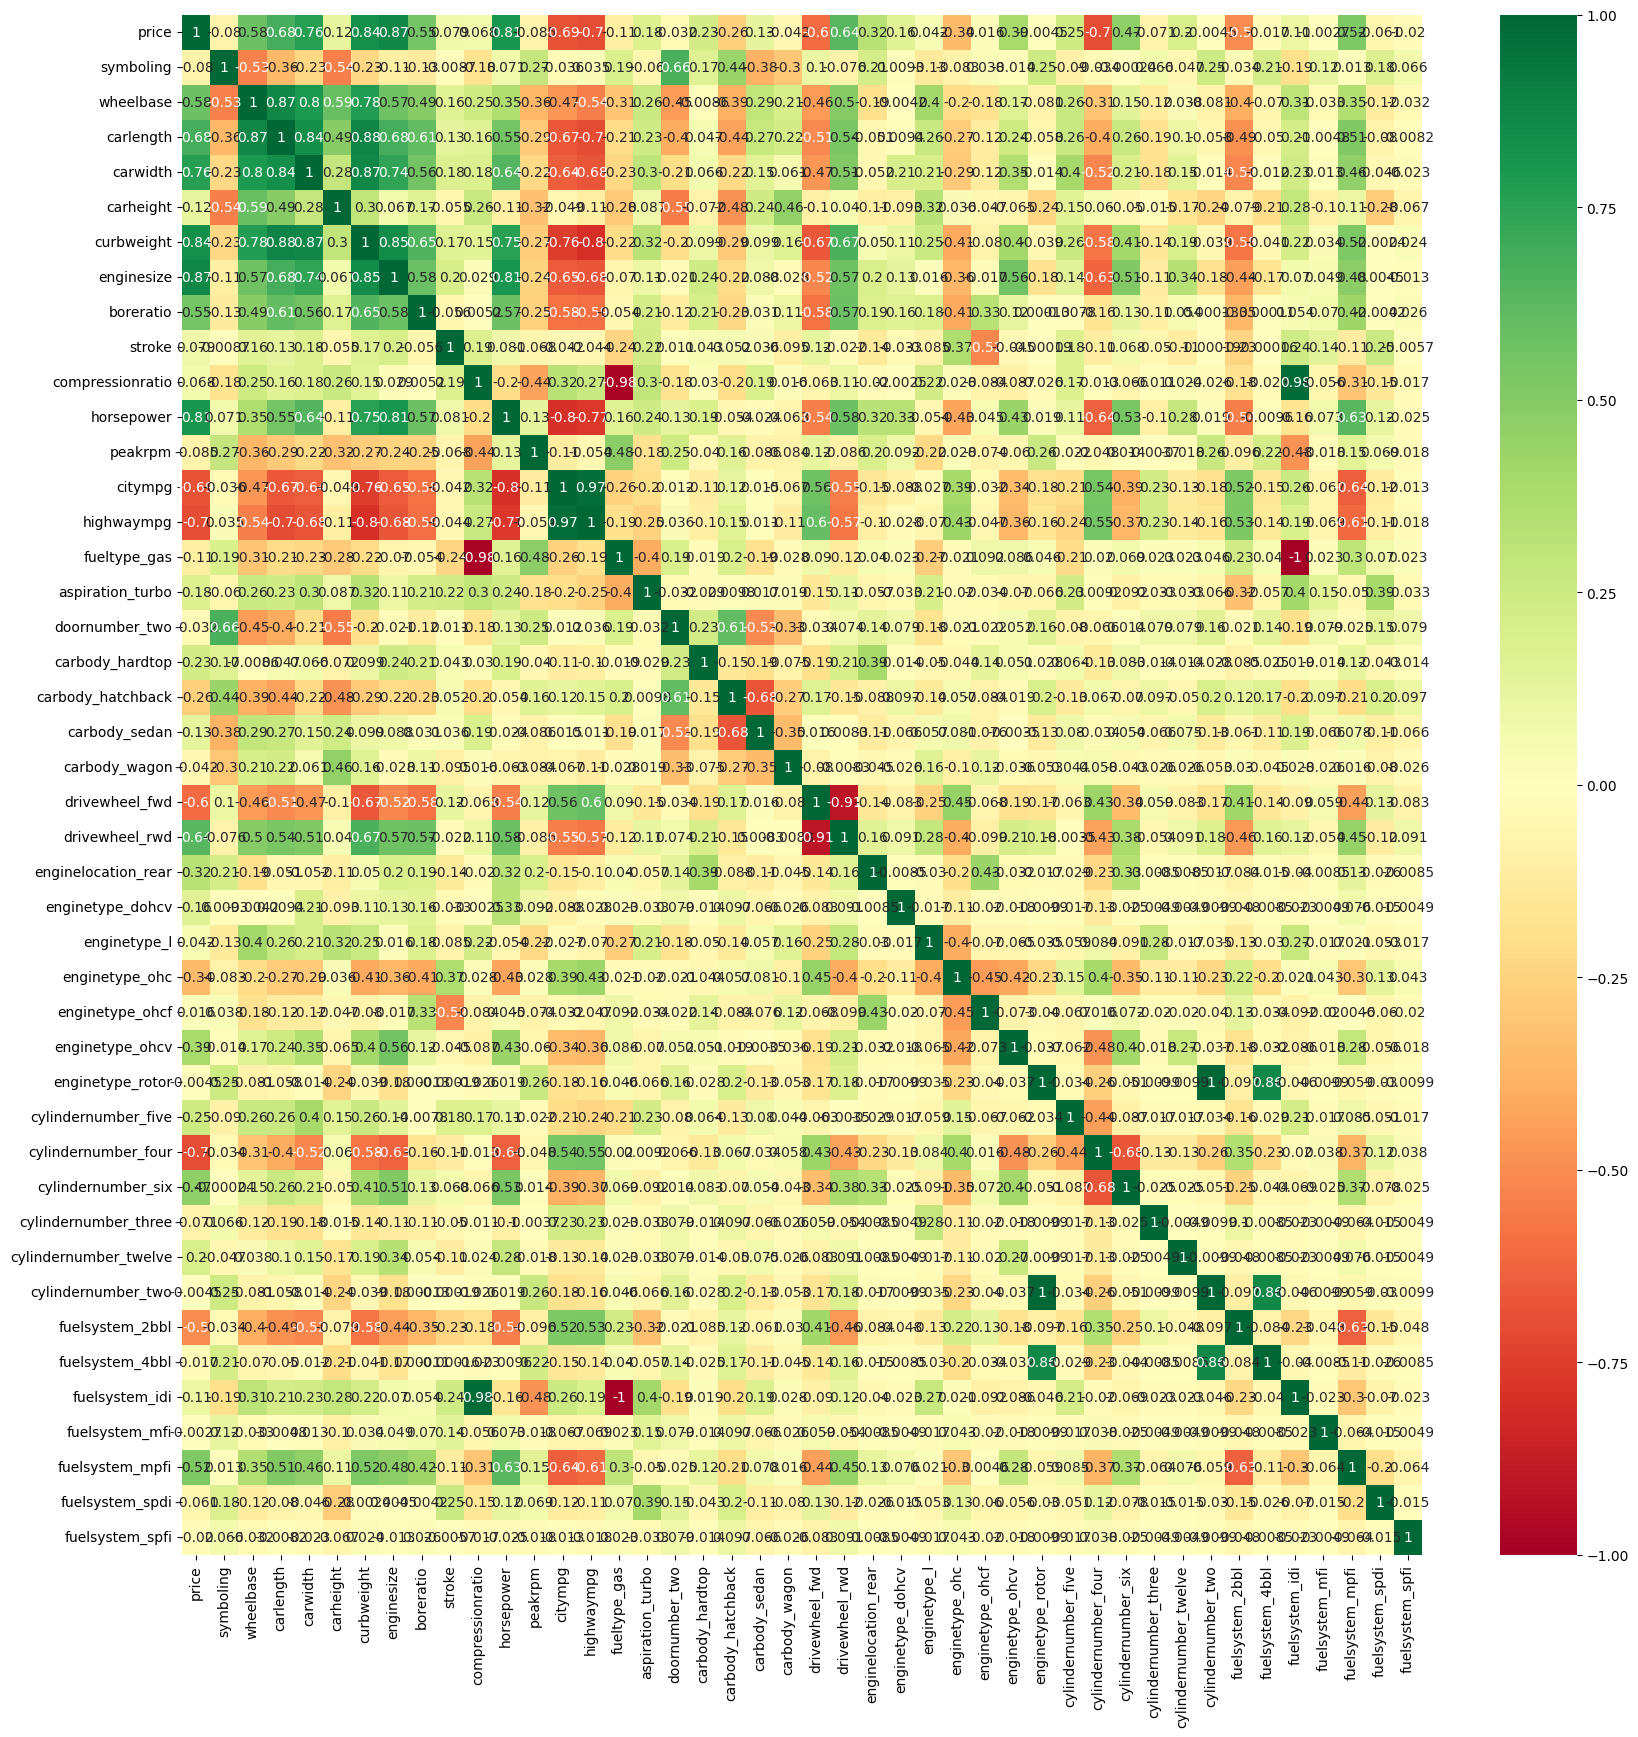

In [15]:
import matplotlib.pyplot as plt
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
g = sns.heatmap(final_dataset[top_corr_features].corr(), cmap="RdYlGn", annot=True)


In [16]:
final_dataset.head()

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,16500.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,16500.0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,13950.0,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,17450.0,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
X = final_dataset.iloc[:, 1:]
y = final_dataset.iloc[:, 0]

In [18]:
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[2.73080143e-03 1.31233323e-02 1.68939795e-02 2.94236261e-02
 4.93919033e-03 1.51434877e-01 1.41605372e-01 4.96997186e-02
 5.23736927e-03 3.51367304e-03 3.82353744e-02 1.31034503e-02
 3.12805682e-02 3.59900756e-02 1.36381448e-03 7.56321434e-03
 2.07738779e-03 2.30671790e-03 1.30418186e-02 1.73775122e-03
 5.17763983e-04 6.06042011e-03 3.32329766e-02 4.93861087e-03
 7.68340787e-04 3.67859191e-04 5.52281717e-03 7.44872177e-03
 5.49903880e-03 1.79853831e-04 3.96074213e-03 3.44244854e-01
 3.24075274e-03 3.06379153e-04 8.82366087e-05 1.44734489e-04
 2.71871407e-03 3.94030487e-04 1.27910548e-03 5.92990313e-06
 1.35864438e-02 1.26303386e-04 6.52589996e-05]


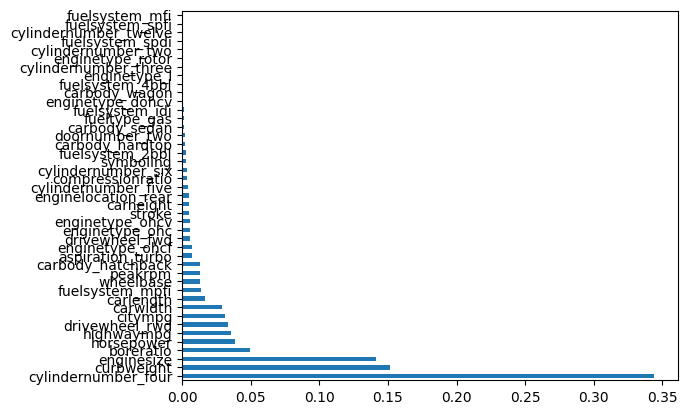

In [22]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(43).plot(kind='barh')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
X_train.shape

(164, 43)

***Random Forest Regression***

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor() 

In [26]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [27]:
from sklearn.model_selection import RandomizedSearchCV
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [28]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [29]:
rf = RandomForestRegressor()

In [30]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [31]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.7s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.5s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.9s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

<ipython-input-32-736d6f0dc612>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='price', ylabel='Density'>

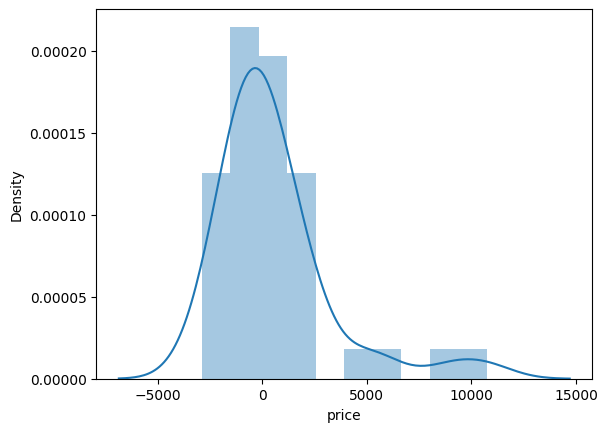

In [32]:
predictions=rf_random.predict(X_test)
sns.distplot(y_test-predictions)

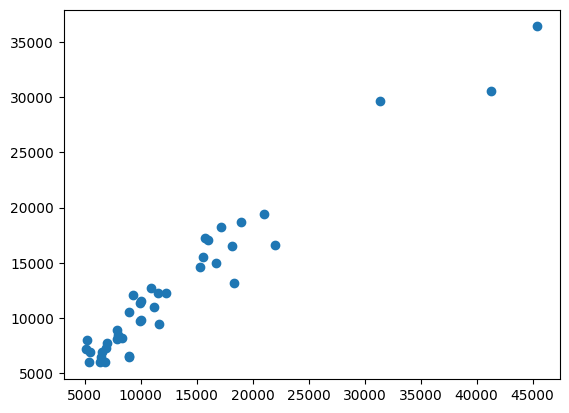

In [33]:
plt.scatter(y_test,predictions)

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions, y_test)

7817357.404786341

In [35]:
y_test

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
170    11199.0
76      5389.0
154     7898.0
104    17199.0
33      6529.0
12     20970.0
129    31400.5
55     10945.0
66     18344.0
45      8916.5
169     9989.0
130     9295.0
7      18920.0
37      7895.0
152     6488.0
80      9959.0
111    15580.0
131     9895.0
171    11549.0
179    15998.0
138     5118.0
156     6938.0
113    16695.0
161     8358.0
89      5499.0
183     7975.0
193    12290.0
125    22018.0
173     8948.0
92      6849.0
16     41315.0
189    11595.0
136    18150.0
22      6377.0
74     45400.0
44      8916.5
Name: price, dtype: float64

In [36]:
predictions

array([ 6016.633     , 17288.616002  , 14649.45642267,  8044.18750033,
        9822.27916667, 11001.33425133,  5974.24166667,  8103.05041667,
       18251.74683733,  6933.0415    , 19461.12183467, 29629.08900367,
       12693.23908333, 13212.05500033,  6575.76673333, 11521.012751  ,
       12064.603251  , 18727.02267   ,  8902.34033333,  6437.87046667,
        9771.585917  , 15493.61158333, 11347.12991767, 12254.88625133,
       17101.225008  ,  7202.28196667,  7714.862     , 14989.846     ,
        8151.12233333,  6889.297     ,  8432.206     , 12229.05883467,
       16585.69975333, 10544.30183333,  7281.9725    , 30569.775171  ,
        9503.64525   , 16543.26533967,  5978.4065    , 36405.77928571,
        6447.26065   ])

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1718.6599183240419
MSE: 7817357.404786341
RMSE: 2795.953755838308


In [38]:
predictions_train=rf_random.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, predictions_train))
print('MSE:', metrics.mean_squared_error(y_train, predictions_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))

MAE: 561.0088181620199
MSE: 630508.7256400379
RMSE: 794.0457956818599


***Linear Regression***


In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred_lr = lr.predict(X_test)

In [41]:
y_pred_lr

array([ 5598.51132225, 19284.09683254, 15432.08576242,  4917.53497998,
       10084.59078819, 12721.62895824,  6743.86779745,  5521.89462584,
       17258.53862088,  7557.03775379, 19107.41004927, 32548.19206626,
       12732.20089207, 14562.31159213,  6853.42941493, 12392.11726522,
        9139.24245654, 19715.56566882,  8772.0965656 ,  7115.51084387,
        9784.18501838, 16239.052024  ,  9476.5474341 , 13226.61910208,
       21704.30856386,  7560.02855002,  7512.07412895, 16144.88656827,
        6862.31560916,  5441.51614926,  9612.07126046, 10516.11445314,
       17020.53972944,  9441.57716981,  6401.22010532, 28123.98974296,
       13714.7970176 , 12665.99067368,  5444.69708876, 36926.33124978,
        6433.60666821])

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE: 2021.1532366033168
MSE: 10305271.908643799
RMSE: 3210.1825350973113


In [43]:
y_pred_lr_train = lr.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_lr_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_lr_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_lr_train)))

MAE: 1276.8568442752833
MSE: 2859218.7970245495
RMSE: 1690.9224692529665


***Lasso Regression***

In [44]:
from sklearn.linear_model import Lasso
l = Lasso(alpha = 0.00001)
l.fit(X_train, y_train)
y_pred_l = l.predict(X_test)
# mean_squared_error(y_pred, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+08, tolerance: 9.845e+05
  model = cd_fast.enet_coordinate_descent(


In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_l))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_l))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_l)))

MAE: 2021.1082703381721
MSE: 10302178.237829566
RMSE: 3209.7006461396936


In [46]:
y_pred_l_train = l.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_l_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_l_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_l_train)))

MAE: 1276.6236500868476
MSE: 2859227.783767385
RMSE: 1690.925126600047


***Ridge Regression***

In [47]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [48]:
y_pred_R=R.predict(X_test)

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_R))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_R))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_R)))

MAE: 2021.2202932139576
MSE: 10304825.712617714
RMSE: 3210.1130373582973


In [50]:
y_pred_R_train = R.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_R_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_R_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_R_train)))

MAE: 1276.8403180191174
MSE: 2859218.907429935
RMSE: 1690.9225018994616


***ElasticNet Regression***

In [51]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha = 0.00001, l1_ratio = 0.001)
enet.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.349e+08, tolerance: 9.845e+05
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1e-05, l1_ratio=0.001)

In [52]:
y_pred_enet = enet.predict(X_test)

In [53]:
y_pred_enet

array([ 5599.06248814, 19277.61427455, 15439.85477622,  4877.64570785,
       10099.47749163, 12729.01903432,  6743.86640406,  5529.93898324,
       17268.55768736,  7555.96994533, 19114.22200789, 32544.92137063,
       12733.69023918, 14552.53442792,  6859.22502345, 12407.35671873,
        9143.55981197, 19710.99943227,  8768.58995742,  7110.63258032,
        9777.09439789, 16245.20640615,  9474.90201595, 13238.72057406,
       21698.64936362,  7552.94632282,  7511.13774173, 16142.18942521,
        6859.08743849,  5449.52980224,  9614.40536735, 10512.40224118,
       17038.53930054,  9443.43662424,  6406.41111403, 28126.97624113,
       13703.73266788, 12662.81518938,  5449.08411919, 36933.70007123,
        6439.94647511])

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_enet))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_enet))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_enet)))

MAE: 2021.7419194600814
MSE: 10295161.094149757
RMSE: 3208.6073449628825


In [55]:
y_pred_enet_train = enet.predict(X_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_enet_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_enet_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_enet_train)))

MAE: 1276.459457070115
MSE: 2859249.516429321
RMSE: 1690.9315528516584
